# Energy prediction model

## Imports

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor



In [ ]:
dataset = pd.read_csv('/content/Hackaton Data.csv')


In [ ]:
def color_cells(val):
    color = 'green' if val > 55 else 'red'
    return f'background-color: {color}'


## Dataset

In [ ]:
dataset

,Width [m],Depth [m],Area [m2],Height [m],Orientation,WWR [%],SHD,Cooling[kWh],Heating[kWh],Lighting[kWh],EUI [kwh/m2],EffDepth[m],DA [%],UDI [%],CDA [%],SDA [Area%],img,threeD,Rating
0,4.5,10,45,3.0,0,0.4,0,1775.336166,4019.071531,694.957328,144.208112,4.75,40.000000,46.111111,54.444444,50.00,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
1,4.5,10,45,3.6,0,0.4,0,1913.459768,4279.592955,627.582736,151.569677,5.25,43.888889,51.111111,57.222222,55.00,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
2,4.5,10,45,4.2,0,0.4,0,2044.072567,4561.665896,452.009184,156.838837,5.75,46.666667,56.666667,61.111111,58.89,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
3,4.5,10,45,3.0,135,0.4,0,1636.365174,4613.369826,901.327576,158.912502,3.75,29.444444,43.333333,40.000000,37.78,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
4,4.5,10,45,3.6,135,0.4,0,1679.937890,5064.550758,739.431426,166.309335,3.75,32.777778,48.333333,44.444444,40.00,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,4.5,8,36,3.6,45,0.8,6,1820.496833,3851.704726,48.111160,158.897575,7.75,75.694444,50.000000,100.000000,100.00,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
644,4.5,8,36,4.2,45,0.8,6,2125.666415,4070.531563,27.638235,172.884339,7.75,100.000000,41.666667,100.000000,100.00,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
645,4.5,8,36,3.0,90,0.8,6,1564.424882,4008.332871,150.735797,158.985932,5.75,56.250000,64.583333,77.777778,70.14,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0
646,4.5,8,36,3.6,90,0.8,6,1814.436822,4318.441752,66.546596,172.206255,7.75,68.055556,58.333333,100.000000,99.31,https://tt-acm.github.io/DesignExplorer/design...,https://tt-acm.github.io/DesignExplorer/design...,0


## Colopring the Rooms with SDA more than 55

In [ ]:
styled_df = dataset.style.applymap(color_cells, subset=['SDA [Area%]'])  # Applying it only to column 'A'
styled_df

,Width [m],Depth [m],Area [m2],Height [m],Orientation,WWR [%],SHD,Cooling[kWh],Heating[kWh],Lighting[kWh],EUI [kwh/m2],EffDepth[m],DA [%],UDI [%],CDA [%],SDA [Area%],img,threeD,Rating
0,4.500000,10,45,3.000000,0,0.400000,0,1775.336166,4019.071531,694.957328,144.208112,4.750000,40.000000,46.111111,54.444444,50.000000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_3.0_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_3.0.json,0
1,4.500000,10,45,3.600000,0,0.400000,0,1913.459768,4279.592955,627.582736,151.569677,5.250000,43.888889,51.111111,57.222222,55.000000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_3.6_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_3.6.json,0
2,4.500000,10,45,4.200000,0,0.400000,0,2044.072567,4561.665896,452.009184,156.838837,5.750000,46.666667,56.666667,61.111111,58.890000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_4.2_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_0.0_RMDEPTH_10.0_RMH_4.2.json,0
3,4.500000,10,45,3.000000,135,0.400000,0,1636.365174,4613.369826,901.327576,158.912502,3.750000,29.444444,43.333333,40.000000,37.780000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_3.0_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_3.0.json,0
4,4.500000,10,45,3.600000,135,0.400000,0,1679.937890,5064.550758,739.431426,166.309335,3.750000,32.777778,48.333333,44.444444,40.000000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_3.6_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_3.6.json,0
5,4.500000,10,45,4.200000,135,0.400000,0,1809.852796,5486.842676,632.340733,176.200805,4.250000,35.000000,48.888889,47.777778,45.000000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_4.2_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_135.0_RMDEPTH_10.0_RMH_4.2.json,0
6,4.500000,10,45,3.000000,180,0.400000,0,1539.029747,4690.948475,985.065021,160.334294,3.250000,27.777778,48.888889,40.000000,35.000000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_3.0_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_3.0.json,0
7,4.500000,10,45,3.600000,180,0.400000,0,1600.892071,5138.017664,866.673290,169.012956,3.750000,30.000000,49.444444,43.888889,39.440000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_3.6_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_3.6.json,0
8,4.500000,10,45,4.200000,180,0.400000,0,1727.329948,5553.301973,831.336929,180.265974,4.250000,35.000000,50.555556,45.000000,43.330000,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_4.2_Perspective.png,https://tt-acm.github.io/DesignExplorer/design_explorer_data/DefaultData/SHDCOUNT_0.0_GLZPER_0.4_ROOMOR_180.0_RMDEPTH_10.0_RMH_4.2.json,0
9,4.500000,10,45,3.000000,225,0.400000,0,1693

## Code

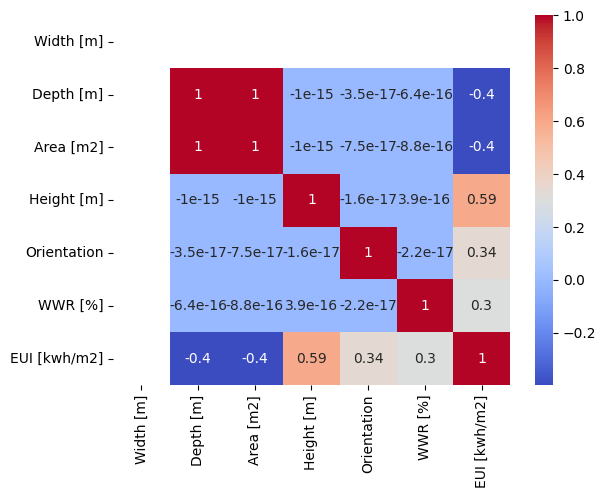

In [ ]:
dataset_test = dataset[[ 'Width [m]',  'Depth [m]',  'Area [m2]','Height [m]', 'Orientation', 'WWR [%]','EUI [kwh/m2]']]
corr_matrix = dataset_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Assuming you have a DataFrame 'df'
selected_columns = ['Depth [m]','Height [m]', 'Orientation', 'WWR [%]','EUI [kwh/m2]']  # Replace these with your column names
df_EUI = dataset[selected_columns]
df_EUI

,Depth [m],Height [m],Orientation,WWR [%],EUI [kwh/m2]
0,10,3.0,0,0.4,144.208112
1,10,3.6,0,0.4,151.569677
2,10,4.2,0,0.4,156.838837
3,10,3.0,135,0.4,158.912502
4,10,3.6,135,0.4,166.309335
...,...,...,...,...,...
643,8,3.6,45,0.8,158.897575
644,8,4.2,45,0.8,172.884339
645,8,3.0,90,0.8,158.985932
646,8,3.6,90,0.8,172.206255


In [ ]:
df_EUI.describe()

,Depth [m],Height [m],Orientation,WWR [%],EUI [kwh/m2]
count,648.000000,648.000000,648.000000,648.000000,648.000000
mean,8.000000,3.600000,157.500000,0.600000,170.830798
std,1.634255,0.490276,103.187604,0.163425,17.226798
min,6.000000,3.000000,0.000000,0.400000,136.764716
25%,6.000000,3.000000,78.750000,0.400000,159.004598
50%,8.000000,3.600000,157.500000,0.600000,169.145900
75%,10.000000,4.200000,236.250000,0.800000,181.026517
max,10.000000,4.200000,315.000000,0.800000,230.143309


In [ ]:
predictors = ['Depth [m]','Height [m]', 'Orientation', 'WWR [%]']
x = df_EUI[predictors]
y = df_EUI[['EUI [kwh/m2]']]


## Heatmap EUI

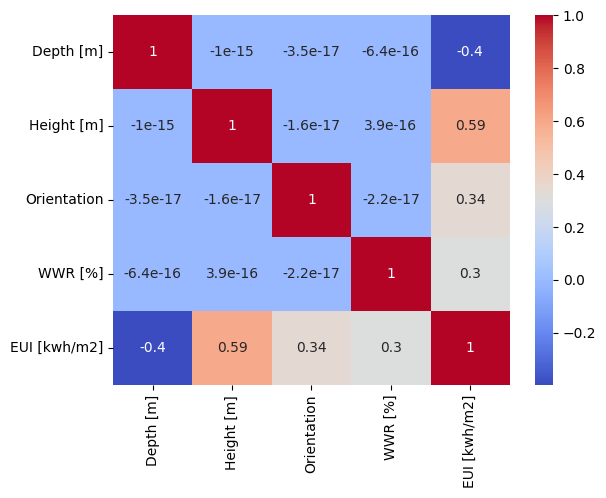

In [ ]:

corr_matrix = df_EUI.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Code

In [ ]:
print(corr_matrix['EUI [kwh/m2]'])

Depth [m]      -0.397658
Height [m]      0.592472
Orientation     0.343986
WWR [%]         0.300066
EUI [kwh/m2]    1.000000
Name: EUI [kwh/m2], dtype: float64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=9)


In [ ]:
lmModel  = LinearRegression()
lmModel.fit(x_train, y_train)


LinearRegression()

In [ ]:
predicted_EUI = lmModel.predict(x_test)


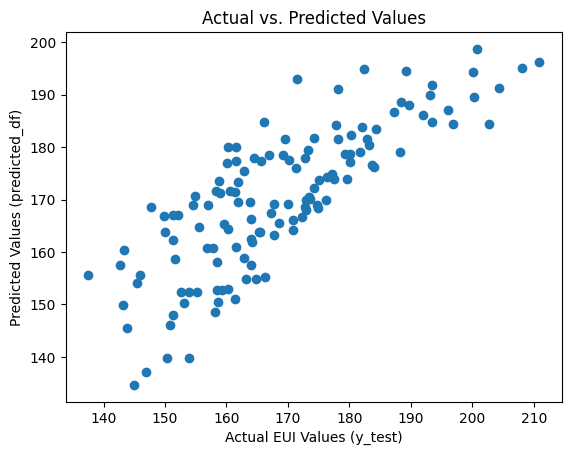

In [ ]:
plt.scatter(y_test, predicted_EUI)
plt.xlabel("Actual EUI Values (y_test)")
plt.ylabel("Predicted Values (predicted_df)")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, predicted_EUI)
mse = mean_squared_error(y_test, predicted_EUI)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_EUI)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")


Mean Absolute Error (MAE): 7.569496383003306
Mean Squared Error (MSE): 86.22710894814652
Root Mean Squared Error (RMSE): 9.285855315917136
R-squared (R^2): 0.6347522641534245


## Predict EUI manually

In [ ]:
data = {
    'Depth [m]': [8],
    'Height [m]': [4],
    'Orientation': [180],
    'WWR [%]': [0.8]
}



df_EUI_testing = pd.DataFrame(data)

In [ ]:
predicted_EUI_testing = lmModel.predict(df_EUI_testing)
print(predicted_EUI_testing)

[[187.43026958]]


## Predict EUI with new data

In [ ]:
# dataset2 = pd.read_csv('/content/Hackaton Data.csv')
# predictors = ['Depth [m]','Height [m]', 'Orientation', 'WWR [%]']
# df_EUI_prediction = dataset2[predictors]
# lmModel.predict(df_EUI_prediction)

In [ ]:
dataset3 = pd.read_csv('/content/community1.xlsx - Sheet1 (4).csv')

In [ ]:

predictors = ['Depth [m]','Height [m]', 'Orientation', 'WWR [%]']
df_EUI_prediction = dataset3[predictors]
lmModel.predict(dataset3[predictors])

array([[40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [53.61962613],
       [40.59237447],
       [53.61962613],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [66.6468778 ],
       [53.61962613],
       [66.6468778 ],
       [53.61962613],
       [66.6468778 ],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [53.61962613],
       [53.61962613],
       [40.59237447],
       [40.59237447],
       [53.61962613],
       [40.59237447],
       [53.61962613],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [53.61962613],
       [53.61962613],
       [40.59237447],
       [40.59237447],
       [40.59237447],
       [66.6468778 ],
       [40.59237447],
       [40.59237447],
       [40

## Scatter plots of EUI

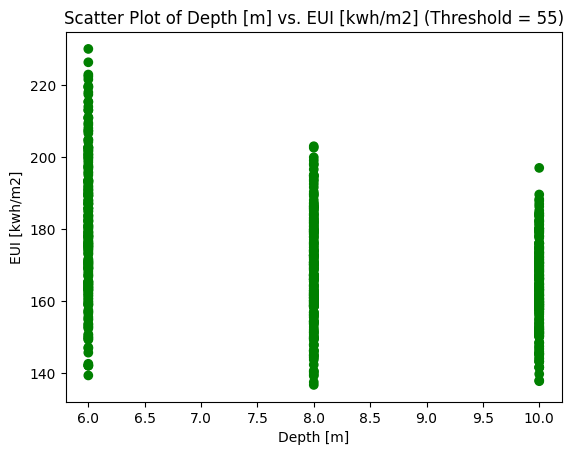

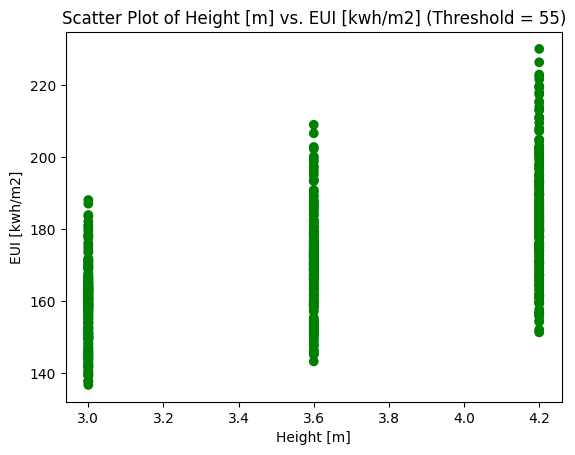

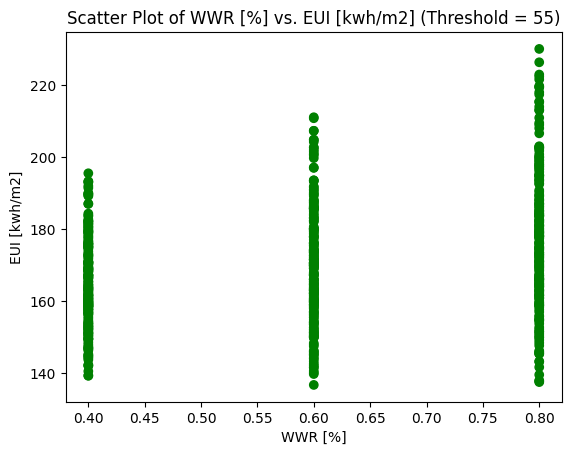

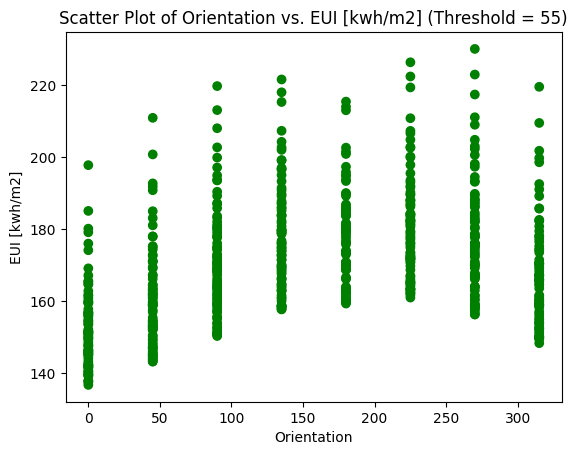

In [ ]:
threshold = 55

# Create a function to assign colors based on the threshold
def assign_color(sda_value):
    return 'green' if sda_value >= threshold else 'black'

# Create three scatter plots, one for each column
columns_to_plot = ['Depth [m]', 'Height [m]', 'WWR [%]', 'Orientation']

for col in columns_to_plot:
    plt.figure()
    plt.scatter(df_EUI[col], df_EUI['EUI [kwh/m2]'], c=df_EUI['EUI [kwh/m2]'].apply(assign_color))
    plt.xlabel(col)
    plt.ylabel('EUI [kwh/m2]')
    plt.title(f'Scatter Plot of {col} vs. EUI [kwh/m2] (Threshold = {threshold})')
    plt.show()


## Heatmap

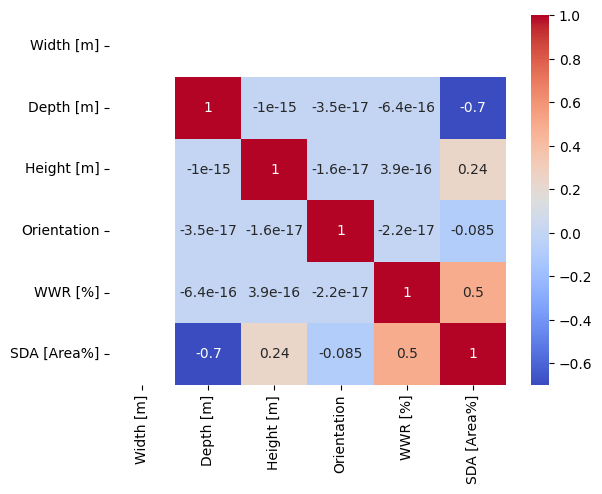

In [ ]:
dataset_test = dataset[[ 'Width [m]',  'Depth [m]','Height [m]', 'Orientation', 'WWR [%]','SDA [Area%]']]
corr_matrix = dataset_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## Code

In [ ]:
# Assuming you have a DataFrame 'df'
selected_columns = ['Depth [m]','Height [m]', 'WWR [%]','SDA [Area%]']  # Replace these with your column names
df_SDA = dataset[selected_columns]
df_SDA

,Depth [m],Height [m],WWR [%],SDA [Area%]
0,10,3.0,0.4,50.00
1,10,3.6,0.4,55.00
2,10,4.2,0.4,58.89
3,10,3.0,0.4,37.78
4,10,3.6,0.4,40.00
...,...,...,...,...
643,8,3.6,0.8,100.00
644,8,4.2,0.8,100.00
645,8,3.0,0.8,70.14
646,8,3.6,0.8,99.31


In [ ]:
predictors = ['Depth [m]','Height [m]', 'WWR [%]']
x = df_SDA[predictors]
y = df_SDA[['SDA [Area%]']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=9)

In [ ]:
lmModel  = LinearRegression()
lmModel.fit(x_train, y_train)


LinearRegression()

In [ ]:
predicted_SDA = lmModel.predict(x_test)

In [ ]:
data = {
    'Depth [m]': [12,8,10],
    'Height [m]': [4,4,3],
    'WWR [%]': [0.7,0.8,0.2]
}

#

df_SDA_testing = pd.DataFrame(data)

In [ ]:
lmModel.predict(df_SDA_testing)

array([[47.20103447],
       [91.60449099],
       [25.03727149]])

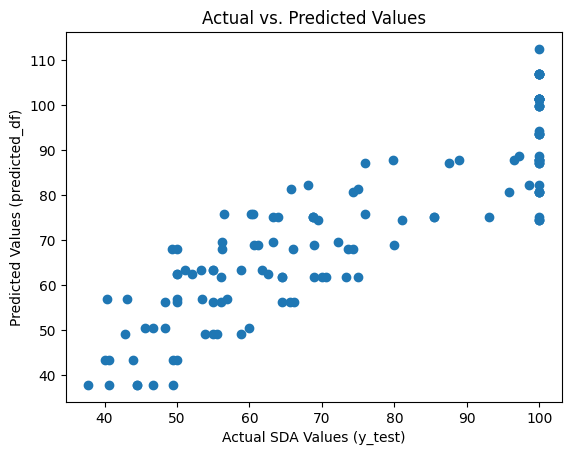

In [ ]:
plt.scatter(y_test, predicted_SDA)
plt.xlabel("Actual SDA Values (y_test)")
plt.ylabel("Predicted Values (predicted_df)")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, predicted_SDA)
mse = mean_squared_error(y_test, predicted_SDA)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted_SDA)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 8.40342638557656
Mean Squared Error (MSE): 106.6757258486151
Root Mean Squared Error (RMSE): 10.328394156335007
R-squared (R^2): 0.764912952099825


## The scatter plot

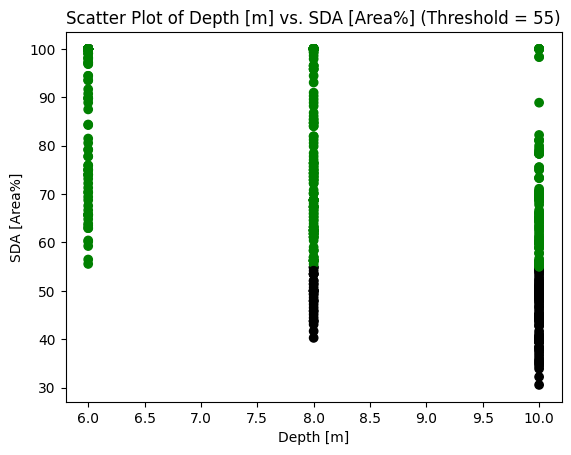

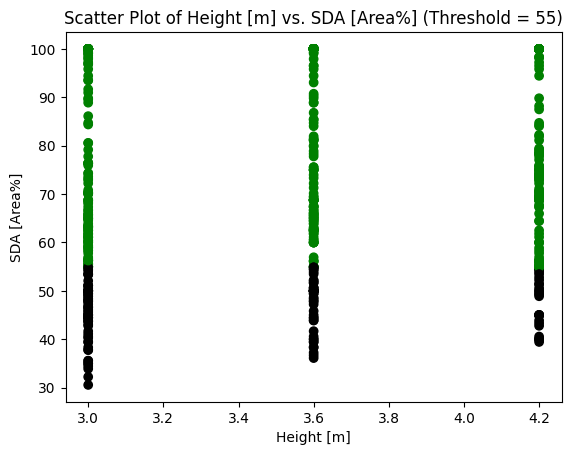

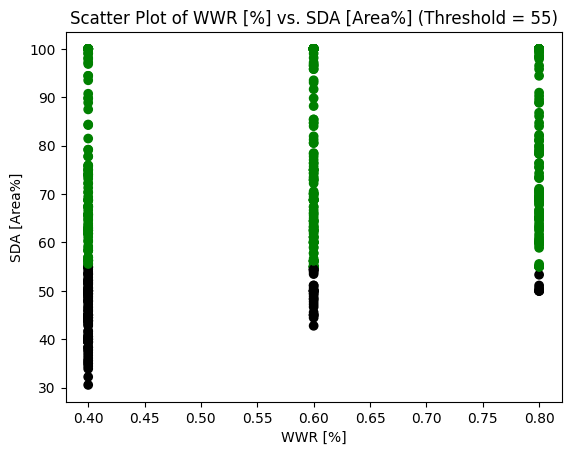

In [ ]:
threshold = 55

# Create a function to assign colors based on the threshold
def assign_color(sda_value):
    return 'green' if sda_value >= threshold else 'black'

# Create three scatter plots, one for each column
columns_to_plot = ['Depth [m]', 'Height [m]', 'WWR [%]']

for col in columns_to_plot:
    plt.figure()
    plt.scatter(df_SDA[col], df_SDA['SDA [Area%]'], c=df_SDA['SDA [Area%]'].apply(assign_color))
    plt.xlabel(col)
    plt.ylabel('SDA [Area%]')
    plt.title(f'Scatter Plot of {col} vs. SDA [Area%] (Threshold = {threshold})')
    plt.show()






## Predict SDA manually

In [ ]:
data = {
    'Depth [m]': [8],
    'Height [m]': [4],
    'WWR [%]': [0.8]
}



df_SDA_testing = pd.DataFrame(data)


In [ ]:
predicted_SDA_testing = lmModel.predict(df_SDA_testing)
print(predicted_SDA_testing)

[[91.60449099]]


## Predict SDA with new data

In [ ]:
# dataset2 = pd.read_csv('/content/Hackaton Data.csv')
# predictors = ['Depth [m]','Height [m]', 'WWR [%]']
# df_SDA_prediction = dataset2[predictors]
# lmModel.predict(df_SDA_prediction)

## Total EUI for a building

In [ ]:
dataset3 = pd.read_csv('/content/community1.xlsx - Sheet1 (3).csv')

In [ ]:
dataset3

,Apartment Parcel,Height [m],WWR [%],Orientation,# Floors,Total Height,Population,Depth [m],EUI,Embodied Carbon
0,0,3.0,0.5,180.0,6.0,18.0,162.0,36.0,NaN,NaN
1,1,3.0,0.5,180.0,7.0,21.0,189.0,36.0,NaN,NaN
2,2,3.0,0.5,180.0,5.0,15.0,135.0,36.0,NaN,NaN
3,3,3.0,0.5,180.0,6.0,18.0,162.0,36.0,NaN,NaN
4,4,3.0,0.5,180.0,7.0,21.0,189.0,36.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
71,76,3.0,0.5,180.0,7.0,21.0,189.0,36.0,NaN,NaN
72,77,3.6,0.5,180.0,5.0,18.0,135.0,36.0,NaN,NaN
73,78,3.6,0.5,180.0,5.0,18.0,135.0,36.0,NaN,NaN
74,79,3.0,0.5,180.0,7.0,21.0,189.0,36.0,NaN,NaN
